In [1]:
import pandas as pd
import numpy as np
import gc

import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from sklearn.preprocessing import LabelEncoder
from utils.reduce_memory import trainform_columns_type

In [ ]:
train_df = pd.read_parquet('./data/train/train_filtered.parquet')
test_df = pd.read_parquet('./data/test/test_filtered.parquet')

# reduce memory by chaing data types of columns
train_df = trainform_columns_type(train_df)
test_df = trainform_columns_type(test_df)

print('shape of train dataset(drop colums)', train_df.shape)
print('shape of test dataset(drop colums)', test_df.shape)

In [3]:
missing_train_df = pd.read_csv('./train_missing_columns.tsv', sep='\t')
missing_test_df = pd.read_csv('./test_missing_columns.tsv', sep='\t')

missing_train_df = missing_train_df[missing_train_df['percent']< 10.0]
missing_test_df = missing_test_df[missing_test_df['percent']< 10.0]

missing_columns_train = missing_train_df['columns'].tolist()
missing_columns_train.append('Segment')
train_df_missing = train_df[missing_columns_train]

missing_columns_test = missing_test_df['columns'].tolist()
test_df_missing = test_df[missing_columns_test]

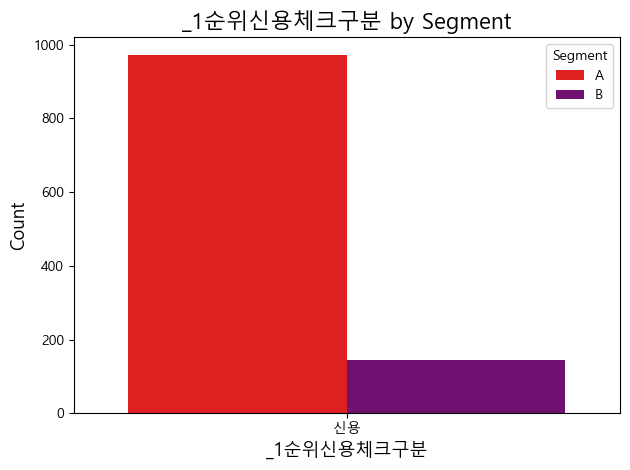

In [14]:
segment_ab = train_df_missing[train_df_missing['Segment'].isin(['A', 'B'])]


col = '_1순위신용체크구분'
custom_palette = {'A': '#FF0000', 'B': '#800080'}  # Segment A는 빨강, B는 보라

# 시각화 방식 선택
if segment_ab[col].dtype == 'object':
    sns.countplot(x=col, hue='Segment', data=segment_ab, palette=custom_palette)
    plt.ylabel('Count', fontsize=13)
else:
    sns.boxplot(x='Segment', y=col, data=segment_ab, palette=custom_palette)
    plt.ylabel(col, fontsize=13)

plt.title(f'{col} by Segment', fontsize=16)
plt.xlabel(col, fontsize=13)
plt.tight_layout()
plt.show()

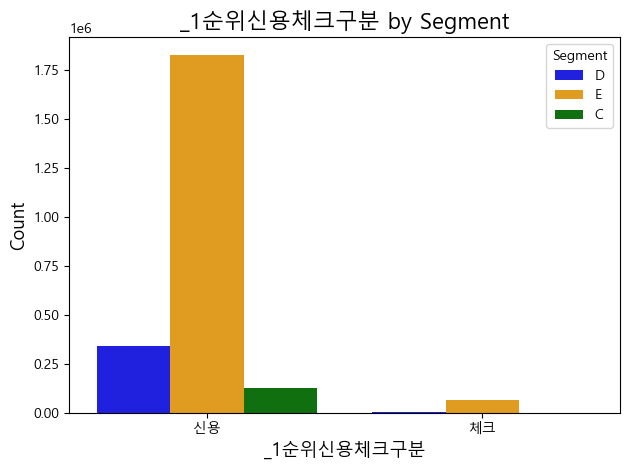

In [18]:
segment_cde = train_df_missing[train_df_missing['Segment'].isin(['C', 'D', 'E'])]


col = '_1순위신용체크구분'
custom_palette = {'C': 'green', 'D': 'blue', 'E':'orange'}  # Segment A는 빨강, B는 보라

# 시각화 방식 선택
if segment_ab[col].dtype == 'object':
    sns.countplot(x=col, hue='Segment', data=segment_cde, palette=custom_palette)
    plt.ylabel('Count', fontsize=13)
else:
    sns.boxplot(x='Segment', y=col, data=segment_cde, palette=custom_palette)
    plt.ylabel(col, fontsize=13)

plt.title(f'{col} by Segment', fontsize=16)
plt.xlabel(col, fontsize=13)
plt.tight_layout()
plt.show()

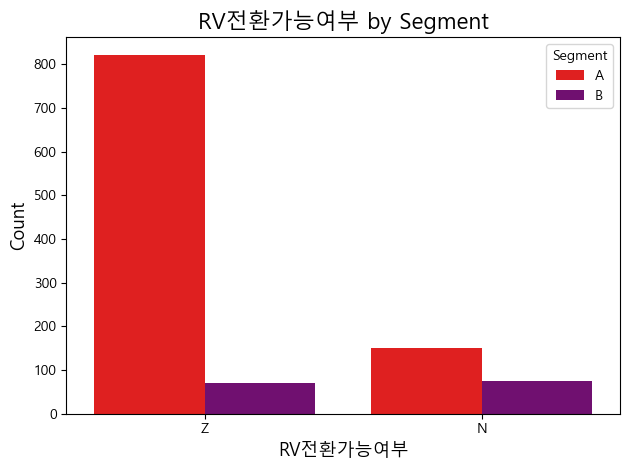

In [ ]:
col = 'RV전환가능여부'

# 시각화 방식 선택
if segment_ab[col].dtype == 'object':
    sns.countplot(x=col, hue='Segment', data=segment_ab, palette=custom_palette)
    plt.ylabel('Count', fontsize=13)
else:
    sns.boxplot(x='Segment', y=col, data=segment_ab, palette=custom_palette)
    plt.ylabel(col, fontsize=13)

plt.title(f'{col} by Segment', fontsize=16)
plt.xlabel(col, fontsize=13)
plt.tight_layout()
plt.show()

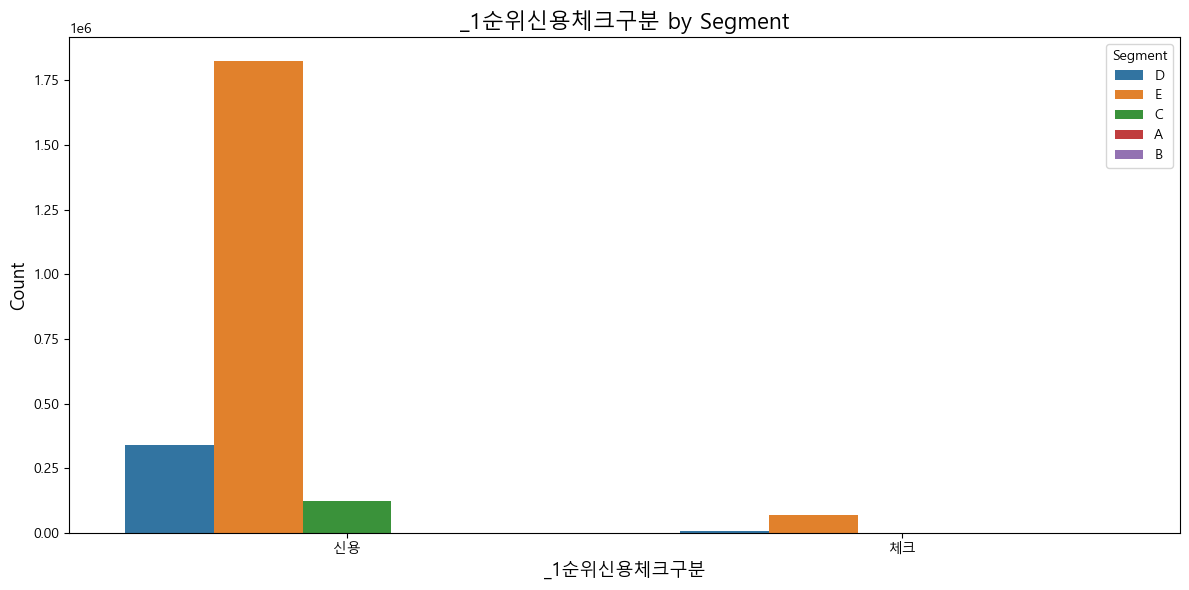

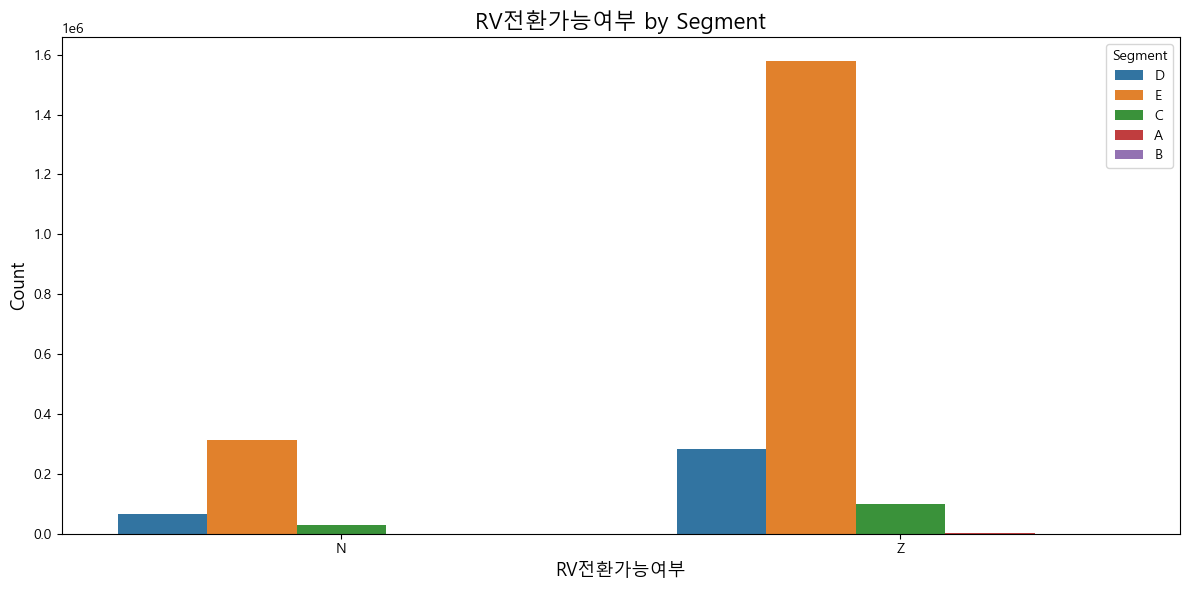

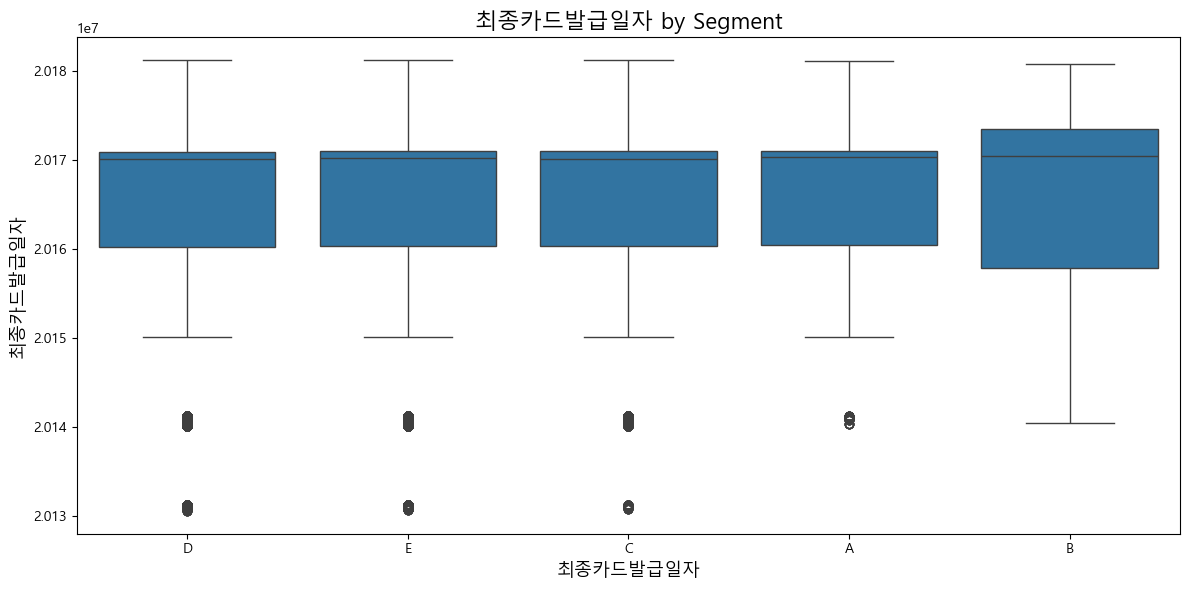

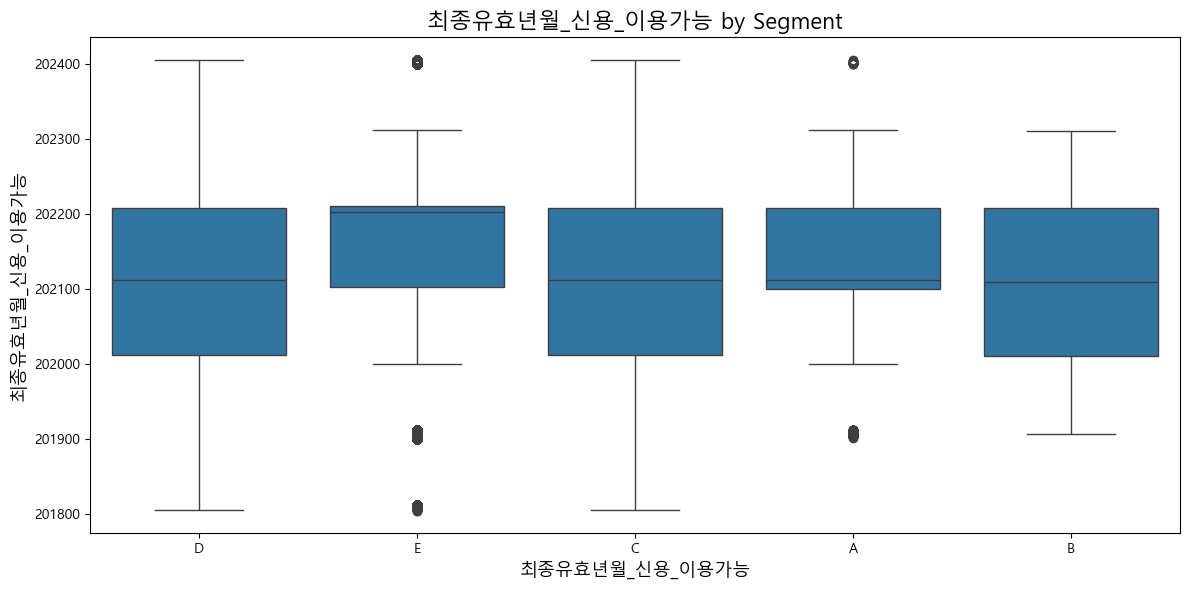

In [ ]:
cols_to_plot = train_df_missing.columns[:-1]  # 마지막이 Segment

# 시각화 방식 선택
if segment_ab[col].dtype == 'object':
    sns.countplot(x=col, hue='Segment', data=segment_ab, palette=custom_palette)
    plt.ylabel('Count', fontsize=13)
else:
    sns.boxplot(x='Segment', y=col, data=segment_ab, palette=custom_palette)
    plt.ylabel(col, fontsize=13)

plt.title(f'{col} by Segment', fontsize=16)
plt.xlabel(col, fontsize=13)
plt.tight_layout()
plt.show()

### _1순위신용체크구분, RV전환가능여부 컬럼 결측치 최빈값으로 대체

In [9]:
train_df.to_parquet('./data/train/train_filtered03.parquet', index=False)
test_df.to_parquet('./data/test/test_filtered03.parquet', index=False)